In [1]:

############################################################
# Alibaba Cloud German AI Challenge 2018
# KF 2018/12/06
############################################################
# I. Imports and Paths
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Check current working directory
os.getcwd()

# Set paths
base_dir = os.path.expanduser('/home/kefeng/German_AI_Challenge/dataset')
path_training = os.path.join(base_dir, 'training.h5')
path_validation = os.path.join(base_dir, 'validation.h5')

# Validate the paths
os.listdir(base_dir)

['validation.h5',
 'original_downloaded_files',
 'round1_test_a_20181109.h5',
 'training.h5']

In [2]:
# II. Overview of the Data
fid_training = h5py.File(path_training, 'r')
fid_validation = h5py.File(path_validation, 'r')

# Have a look at keys stored in the h5 files
print("Overview of Data:")
print('='*60)
print('Training data keys   :', list(fid_training.keys()))
print('Validation data keys :', list(fid_validation.keys()))

print('-'*60)
print("Training data shapes:")
s1_training = fid_training['sen1']
s2_training = fid_training['sen2']
label_training = fid_training['label']
print('  Sentinel 1 data shape :', s1_training.shape)
print('  Sentinel 2 data shape :', s2_training.shape)
print('  Label data shape      :', label_training.shape)
print('-'*60)
print("Validation data shapes:")
s1_validation = fid_validation['sen1']
s2_validation = fid_validation['sen2']
label_validation = fid_validation['label']
print('  Sentinel 1 data shape :', s1_validation.shape)
print('  Sentinel 2 data shape :', s2_validation.shape)
print('  Label data shape      :', label_validation.shape)

Overview of Data:
Training data keys   : ['label', 'sen1', 'sen2']
Validation data keys : ['label', 'sen1', 'sen2']
------------------------------------------------------------
Training data shapes:
  Sentinel 1 data shape : (352366, 32, 32, 8)
  Sentinel 2 data shape : (352366, 32, 32, 10)
  Label data shape      : (352366, 17)
------------------------------------------------------------
Validation data shapes:
  Sentinel 1 data shape : (24119, 32, 32, 8)
  Sentinel 2 data shape : (24119, 32, 32, 10)
  Label data shape      : (24119, 17)


(352366, 17)


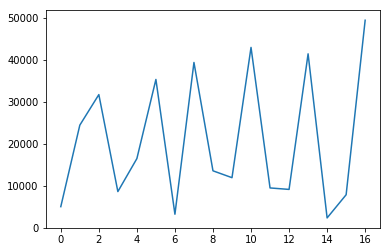

In [3]:
## compute and plot the quantity for each col
label_qty = np.sum(label_training, axis=0)
print(label_training.shape)
plt.plot(label_qty)
plt.show()

(24119, 17)


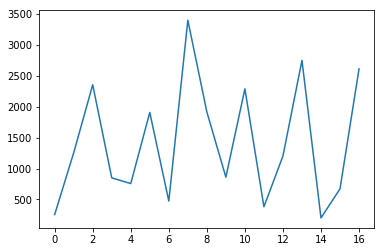

In [4]:
## compute and plot the quantity for each col
label_qty = np.sum(label_validation, axis=0)
print(label_validation.shape)
plt.plot(label_qty)
plt.show()

(376485, 17)


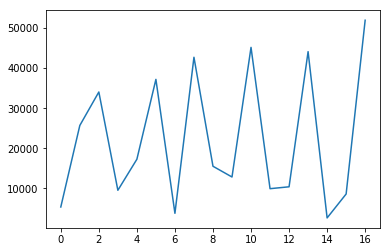

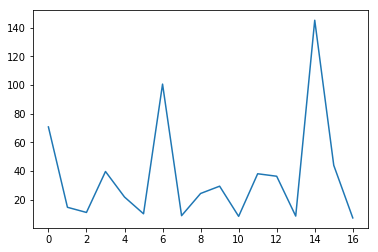

[ 70.7146882   14.65777691  11.05812724  39.63        21.82521739
  10.12165287 100.58375635   8.81264484  24.29248935  29.38075542
   8.3313417   38.04415926  36.31571332   8.53243133 145.13685428
  43.93057176   7.24455434]


In [15]:
label_all = np.concatenate((label_training, label_validation), axis=0)
print(label_all.shape)
label_qty = np.sum(label_all, axis=0)
plt.plot(label_qty)
plt.show()
class_weight = label_all.shape[0]/label_qty
plt.plot(class_weight)
plt.show()
print(class_weight)

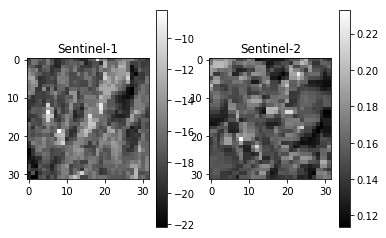

In [5]:
# Visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
plt.subplot(121)
plt.imshow(10*np.log10(s1_training[0,:,:,4]),cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-1')

plt.subplot(122)
plt.imshow(s2_training[0,:,:,1],cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-2')

plt.show()